# Nhập thư viện:

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# Đọc dữ liệu:

In [75]:
df = pd.read_csv('north_size.csv')
df.head()

,DATE_KEY,MONTH_KEY,OUTLET_CODE,LOCATION,OUTLET_CITY,OUTLET_DISTRICT,OUTLET_WARD,URBAN_RURAL,BUSINESSTYPEL1,BUSINESSTYPEL2,...,VARIANT,STD_SKU,REVENUE,SALES_QTY,PROFIT,TOTAL_PROMOTION_COST,POSM_PROMOTION_COST,FG_PROMOTION_COST,DISCOUNT_COST,FG_PROMOTION_QTY
0,2019-05-22,201905,2520945,Ngoài đường,TP. Hà Nội,H. Sóc Sơn,X. Đức Hòa (H. Sóc Sơn),R,Kênh Off Premise,Kênh truyền thống,...,Wake up 247.Wake up 247.Cà phê,Energy Drinks Wake up 247 Cà phê 330ml,7829.05039,19.740,4114.96381,101.31712,0.0,0.00000,101.31712,0.0000
1,2019-05-29,201905,2342827,Ngoài đường,T. Phú Thọ,H. Đoan Hùng,X. Vân Đồn,R,Kênh Off Premise,Kênh truyền thống,...,Nam Ngư.Nam Ngư cao cấp.Cao cấp,Fish Sauces Nam Ngư cao cấp 500ml,38132.08069,23.688,9333.35681,1823.70821,0.0,0.00000,1823.70821,0.0000
2,2019-05-21,201905,2262386,Đường chợ,TP. Hà Nội,Q. Thanh Xuân,P. Nhân Chính,U,Kênh Off Premise,Kênh truyền thống,...,Lovemi.Lovemi chua cay.Tôm,Instant Noodle Lovemi Tôm 75gr,8289.58276,39.480,1994.81160,1114.48835,0.0,1013.17123,101.31712,1.5792
3,2019-05-28,201905,168181,Ngoài đường,T. Lào Cai,H. Sa Pa,TT. Sa Pa,R,Kênh Off Premise,Kênh truyền thống,...,Tam Thái Tử.Tam Thái Tử nhị ca.Nhị Ca,Soya Sauces Tam Thái Tử Nhị Ca 500ml,34539.92816,98.700,8455.11966,1266.46403,0.0,1266.46403,0.00000,3.3558
4,2019-05-24,201905,2006099,Ngoài đường,T. Tuyên Quang,H. Sơn Dương,X. Hồng Lạc (H. Sơn Dương),R,Kênh Off Premise,Kênh truyền thống,...,Wake up 247.Wake up 247.Cà phê,Energy Drinks Wake up 247 Cà phê 330ml,7829.05039,19.740,4114.96381,101.31712,0.0,0.00000,101.31712,0.0000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855070 entries, 0 to 855069
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DATE_KEY              855070 non-null  object 
 1   MONTH_KEY             855070 non-null  int64  
 2   OUTLET_CODE           855070 non-null  int64  
 3   LOCATION              855070 non-null  object 
 4   OUTLET_CITY           855070 non-null  object 
 5   OUTLET_DISTRICT       855070 non-null  object 
 6   OUTLET_WARD           855070 non-null  object 
 7   URBAN_RURAL           855070 non-null  object 
 8   BUSINESSTYPEL1        855070 non-null  object 
 9   BUSINESSTYPEL2        855070 non-null  object 
 10  BUSINESSTYPEL3        855070 non-null  object 
 11  OUTLET_LATITUDE       855070 non-null  float64
 12  OUTLET_LONGITUDE      855070 non-null  float64
 13  DC_CODE               855070 non-null  object 
 14  DC_CITY               855070 non-null  object 
 15  

In [79]:
df.shape

(855070, 33)

# Kiểm tra giá trị missing:

In [82]:
df.isnull().sum()

DATE_KEY                0
MONTH_KEY               0
OUTLET_CODE             0
LOCATION                0
OUTLET_CITY             0
OUTLET_DISTRICT         0
OUTLET_WARD             0
URBAN_RURAL             0
BUSINESSTYPEL1          0
BUSINESSTYPEL2          0
BUSINESSTYPEL3          0
OUTLET_LATITUDE         0
OUTLET_LONGITUDE        0
DC_CODE                 0
DC_CITY                 0
DC_DISTRICT             0
DC_WARD                 0
DC_LATITUDE             0
DC_LONGITUDE            0
DIVISION                0
SUB_CATEGORY            0
BRAND                   0
BRANDY                  0
VARIANT                 0
STD_SKU                 0
REVENUE                 0
SALES_QTY               0
PROFIT                  0
TOTAL_PROMOTION_COST    0
POSM_PROMOTION_COST     0
FG_PROMOTION_COST       0
DISCOUNT_COST           0
FG_PROMOTION_QTY        0
dtype: int64

# Kiểm tra giá trị duplicate:

In [85]:
df.duplicated().sum()

0

# Kiểm tra các giá trị không phù hợp:

In [88]:
df.select_dtypes(include=[np.number]).lt(0).sum()

MONTH_KEY               0
OUTLET_CODE             0
OUTLET_LATITUDE         0
OUTLET_LONGITUDE        0
DC_LATITUDE             0
DC_LONGITUDE            0
REVENUE                 0
SALES_QTY               0
PROFIT                  0
TOTAL_PROMOTION_COST    0
POSM_PROMOTION_COST     0
FG_PROMOTION_COST       0
DISCOUNT_COST           0
FG_PROMOTION_QTY        0
dtype: int64

# Thay thế giá trị trong cột 'LOCATION':

In [91]:
df['LOCATION'] = df['LOCATION'].replace('Đường Chợ','Đường chợ')

In [95]:
df.to_csv('Dulieudetrucquanhoa.csv',encoding='utf-8', index=False)

# Mã hóa biến: 

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['URBAN_RURAL'] = le.fit_transform(df['URBAN_RURAL'])

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855070 entries, 0 to 855069
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DATE_KEY                855070 non-null  object 
 1   MONTH_KEY               855070 non-null  int64  
 2   OUTLET_CODE             855070 non-null  int64  
 3   OUTLET_CITY             855070 non-null  object 
 4   OUTLET_DISTRICT         855070 non-null  object 
 5   OUTLET_WARD             855070 non-null  object 
 6   URBAN_RURAL             855070 non-null  int64  
 7   BUSINESSTYPEL1          855070 non-null  object 
 8   BUSINESSTYPEL2          855070 non-null  object 
 9   BUSINESSTYPEL3          855070 non-null  object 
 10  OUTLET_LATITUDE         855070 non-null  float64
 11  OUTLET_LONGITUDE        855070 non-null  float64
 12  DC_CODE                 855070 non-null  object 
 13  DC_CITY                 855070 non-null  object 
 14  DC_DISTRICT         

# Loại bỏ số ngoại lai:

In [109]:
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df= df[~((df.select_dtypes(include=[np.number]) < lower_bound) | (df.select_dtypes(include=[np.number]) > upper_bound)).any(axis=1)]

# Trực quan hóa ma trận tương quan giữa các biến:

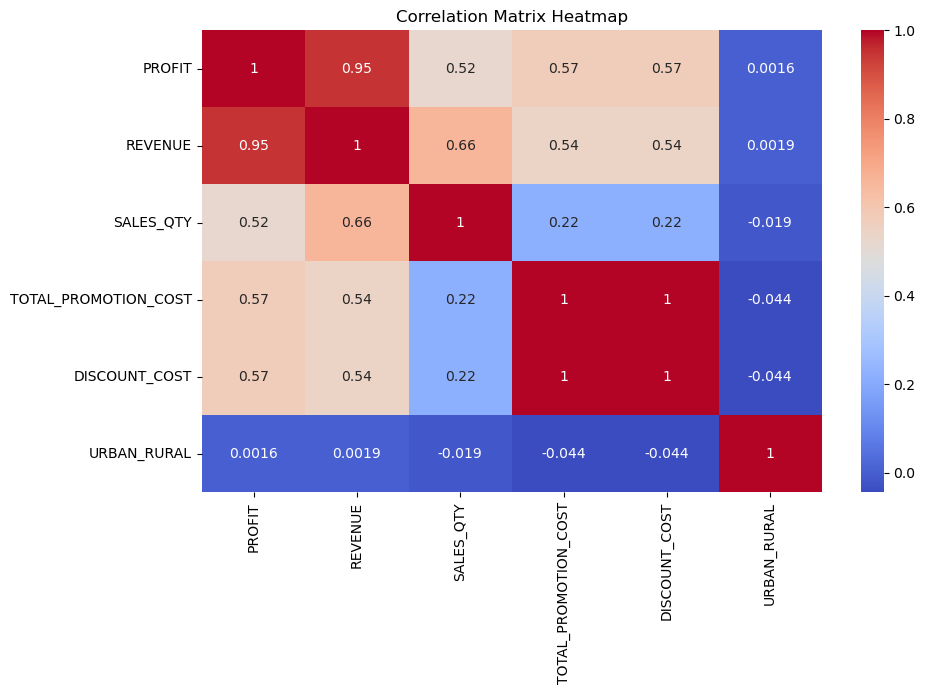

In [113]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['PROFIT', 'REVENUE', 'SALES_QTY', 'TOTAL_PROMOTION_COST', 'DISCOUNT_COST', 'URBAN_RURAL']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Xây dựng mô hình hồi quy:

In [118]:
X = df[['REVENUE', 'SALES_QTY', 'TOTAL_PROMOTION_COST', 'DISCOUNT_COST', 'URBAN_RURAL']]
y = df['PROFIT']

# Chia tỷ lệ dữ liệu:

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

# Tách dữ liệu để training và test:

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [126]:
from sklearn.linear_model import Ridge
pipeline = Pipeline(steps=[
    ('regressor', Ridge())  # Linear Regression model
])

# Lấy các tham số của hồi quy sườn:

In [129]:
param_grid = {
    'regressor__alpha': np.logspace(-1,5, 40),  # Range of alpha values
    'regressor__max_iter': [ 350, 400, 450],  # Maximum number of iterations
    'regressor__positive': [True, False],  # Whether to enforce positive coefficient
    'regressor__solver': ['auto'],  # Solver algorithm
    'regressor__tol': [0.2 ,0.002, 0.02]  # Tolerance for stopping criteria
}

In [131]:
import warnings

# Ignore all warnings:
warnings.filterwarnings('ignore')

In [133]:
grid = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=3)

In [135]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('regressor', Ridge())]),
             param_grid={'regressor__alpha': array([1.00000000e-01, 1.42510267e-01, 2.03091762e-01, 2.89426612e-01,
       4.12462638e-01, 5.87801607e-01, 8.37677640e-01, 1.19377664e+00,
       1.70125428e+00, 2.42446202e+00, 3.45510729e+00, 4.92388263e+00,
       7.01703829e+00, 1.00000000e+01, 1.42510267e+01, 2.03091762e+01,
       2.89...
       2.03091762e+03, 2.89426612e+03, 4.12462638e+03, 5.87801607e+03,
       8.37677640e+03, 1.19377664e+04, 1.70125428e+04, 2.42446202e+04,
       3.45510729e+04, 4.92388263e+04, 7.01703829e+04, 1.00000000e+05]),
                         'regressor__max_iter': [350, 400, 450],
                         'regressor__positive': [True, False],
                         'regressor__solver': ['auto'],
                         'regressor__tol': [0.2, 0.002, 0.02]},
             scoring='neg_mean_squared_error')

In [137]:
print("Best alpha for Ridge Regression:", grid.best_params_['regressor__alpha'])

Best alpha for Ridge Regression: 0.1


# Dự đoán của mô hình:

In [140]:
y_pred = grid.predict(X_test)
y_pred

array([ 514.76784585, 6312.29031526, 1482.01546217, ..., 2644.23043084,
       5997.27030714, 1904.82004443])

In [178]:
best_pipeline = grid.best_estimator_
best_model = best_pipeline.named_steps['regressor']
intercept = best_model.intercept_
coef = best_model.coef_
print('Hệ số chặn: ', intercept)
print('Hệ số Be-ta: ', coef)

Hệ số chăn:  1804.4364498107238
Hệ số Be-ta:  [1792.73361261 -302.1684186    38.25059487   38.25059486   -3.36099671]


# Kiểm tra độ chính xác của mô hình:

In [143]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

In [145]:
print('Ridge Regression Test Mean Squared Error (MSE):', mse)
print('Ridge Regression Test Mean Absolute Error (MAE):', mae)
print('Ridge Regression Test R-squared (R²) Score:', r2)

Ridge Regression Test Mean Squared Error (MSE): 239083.0316380503
Ridge Regression Test Mean Absolute Error (MAE): 239083.0316380503
Ridge Regression Test R-squared (R²) Score: 0.920176827261128


# Kiểm tra liệu mô hình có được tổng quát hóa hay không:

In [148]:
train_prediction = grid.predict(X_train)
test_prediction = grid.predict(X_test)

In [150]:
r2_train = r2_score(y_train, train_prediction)
r2_test = r2_score(y_test, test_prediction)

In [152]:
r2_train

0.9176260714296572

In [154]:
r2_test

0.920176827261128

In [158]:
if r2_train < r2_test:
    print('Mô hình có lẽ đã vị khớp.')
elif r2_train > r2_test:
    print('Mô hình có lẽ đã quá khớp.')
else:
    print('Mô hình không bị vị khớp hay quá khớp.')

Mô hình có lẽ đã vị khớp.


# Vẽ đồ thị:

## Residual Plot:

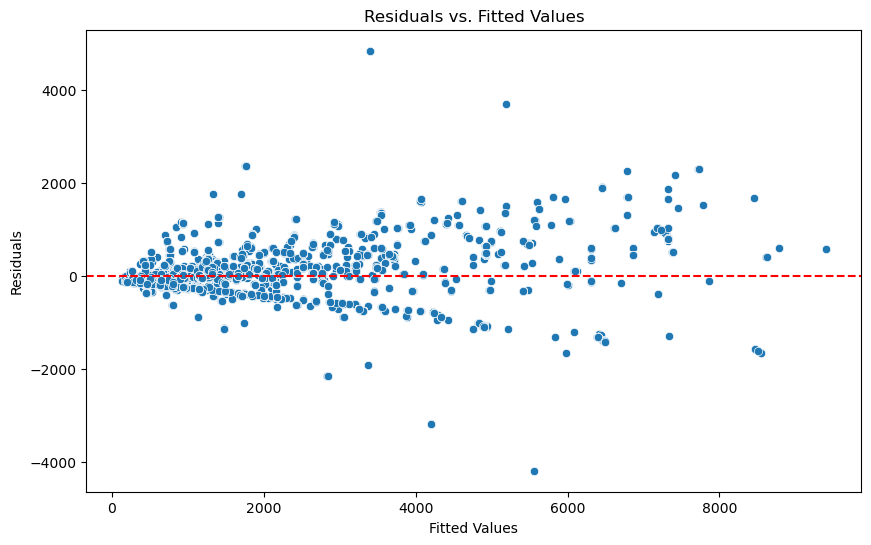

In [162]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

## Residual Distribution:

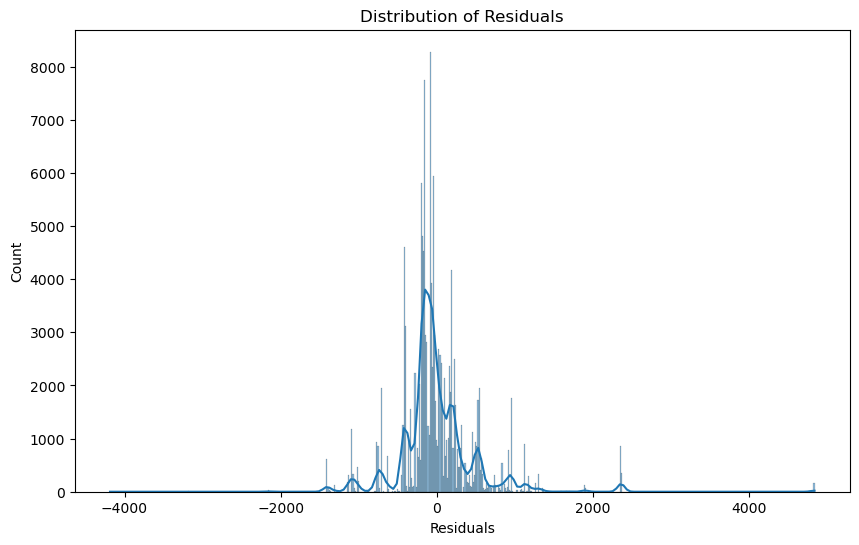

In [165]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

## Actual vs Predicted:

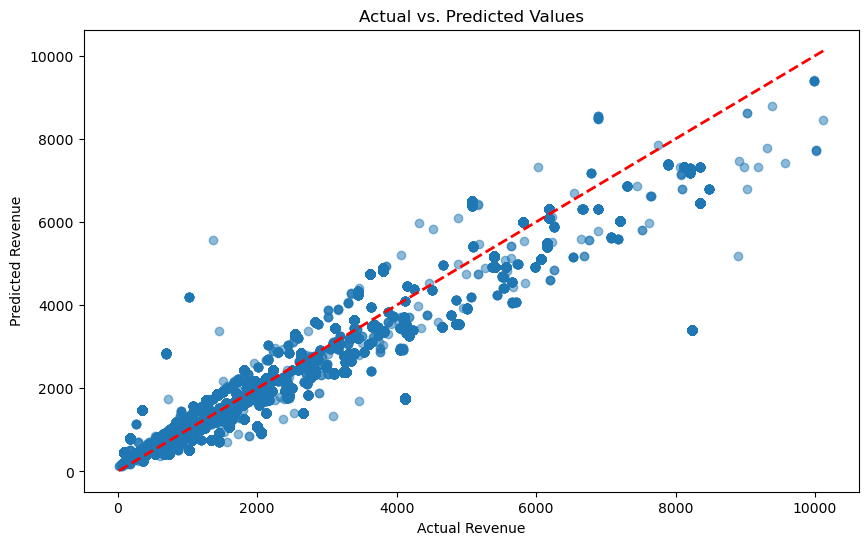

In [168]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()